In [1]:
%load_ext autoreload
%matplotlib inline

import logging
import sys

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib import animation

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

import hyperhyper as hy
import dataset

/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
def get_best(year):
    b = hy.Bunch(f'/mnt/data2/ptf/bunches/b_2{year}')
    db = dataset.connect(f'sqlite:////mnt/data2/ptf/bunches/b_2{year}/results.db')
    statement = 'SELECT DISTINCT neg, eig, dim, pair_args_window FROM experiments where impl="scipy" ORDER BY micro_results DESC LIMIT 1'
    for best in list(db.query(statement)):
        try:
            print(best['neg'])
            kv, res = b.svd(impl='scipy', evaluate=True, pair_args={'subsample_deter': True, 'subsample_factor': 1e-5, 'delete_oov': True, 'window': best['pair_args_window'], 'weighted_window': True}, neg=10, eig=0.1, dim=best['dim'], keyed_vector=True)
            print(res)
            print(best)
        except Exception as e:
            print(e)
    return kv

In [3]:
def draw_image(w, kv):
    pca = PCA(n_components=2)
    scaler = MinMaxScaler()
    vecs = [(w, kv[w])]
    for name, _ in kv.most_similar(w):
        vecs.append((name, kv[name]))
    principalComponents = pca.fit_transform([x[1] for x in vecs])
    principalComponents = scaler.fit_transform(principalComponents)
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 5)

    ax.scatter(principalComponents[:, 0], principalComponents[:, 1], color='black')

    for i, txt in enumerate([x[0] for x in vecs]):
        x = principalComponents[i][0] + 0.02
        y = principalComponents[i][1] - 0.02
        ax.annotate(txt, (x, y))
    return fig


In [4]:
kv1 = get_best(2010)

/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


AttributeError: Can't get attribute 'simple_tokenizer' on <module 'hyperhyper.preprocessing' from '/home/filter/code/hyperhyper/hyperhyper/preprocessing.py'>

In [ ]:
kv2 = get_best(2011)
kv3 = get_best(2012)

In [ ]:
kv4 = get_best(2016)

In [24]:
kv5 = get_best(2017)

5


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.24768468183499617, 'macro': 0.3150545992196253, 'results': [{'name': 'bruni_men', 'score': 0.18867710862308257, 'oov': 0.766}, {'name': 'ws353', 'score': 0.30160185949635243, 'oov': 0.5552407932011332}, {'name': 'ws353_relatedness', 'score': 0.29649649264354666, 'oov': 0.5555555555555556}, {'name': 'radinsky_mturk', 'score': 0.4821649012288224, 'oov': 0.7456445993031359}, {'name': 'luong_rare', 'score': 0.27026437318174523, 'oov': 0.9813176007866273}, {'name': 'ws353_similarity', 'score': 0.3511228601442025, 'oov': 0.5467980295566502}]}
OrderedDict([('neg', 5), ('eig', 0.0), ('dim', 500), ('pair_args_window', 5)])


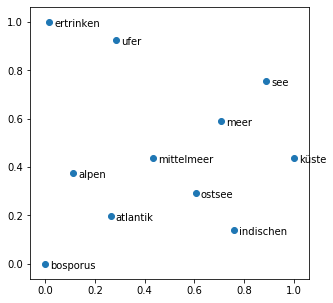

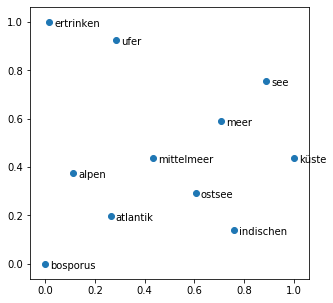

In [25]:
draw_image('mittelmeer', kv1)

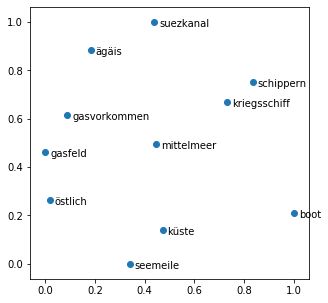

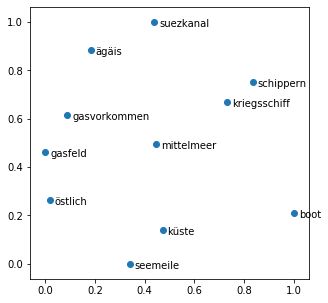

In [26]:
draw_image('mittelmeer', kv2)

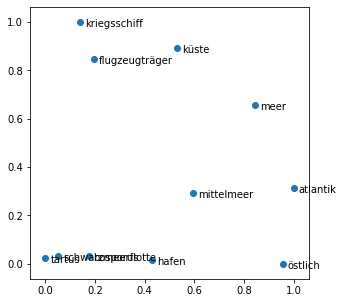

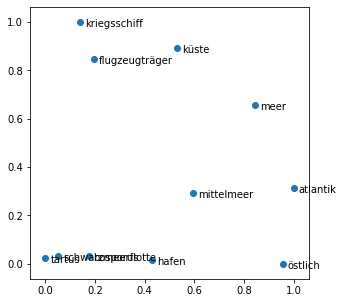

In [27]:
draw_image('mittelmeer', kv3)

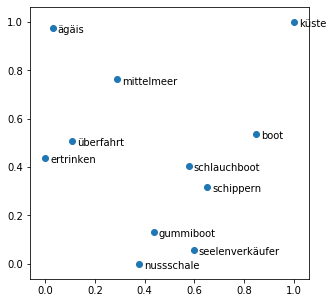

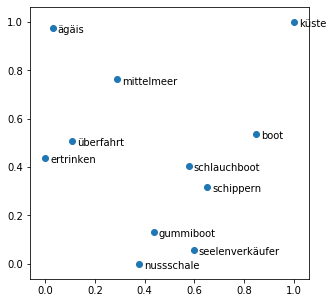

In [28]:
draw_image('mittelmeer', kv4)

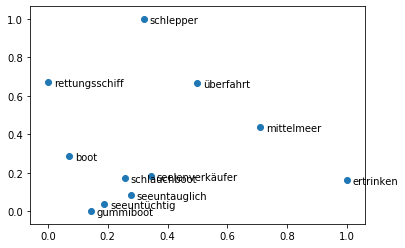

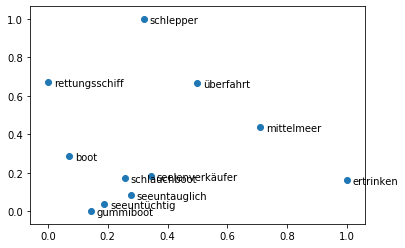

In [16]:
draw_image('mittelmeer', kv5)

/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


16


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.2565070733405564, 'macro': 0.3506687643414936, 'results': [{'name': 'bruni_men', 'score': 0.14640901157149683, 'oov': 0.787}, {'name': 'ws353', 'score': 0.3998259300532115, 'oov': 0.56657223796034}, {'name': 'ws353_relatedness', 'score': 0.4342832533008592, 'oov': 0.5793650793650794}, {'name': 'radinsky_mturk', 'score': 0.5485345745555842, 'oov': 0.7282229965156795}, {'name': 'luong_rare', 'score': 0.23568717535466188, 'oov': 0.9808259587020649}, {'name': 'ws353_similarity', 'score': 0.33927264121314776, 'oov': 0.5467980295566502}]}
OrderedDict([('neg', 16), ('eig', 0.15000000000000002), ('dim', 500), ('pair_args_window', 5)])


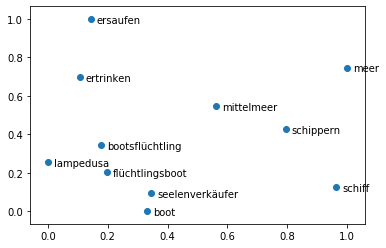

In [4]:
draw_image('mittelmeer', get_best(2014))

/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


8


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.21463602799986609, 'macro': 0.3090290097199368, 'results': [{'name': 'bruni_men', 'score': 0.14206038334848997, 'oov': 0.778}, {'name': 'ws353', 'score': 0.2791199801469158, 'oov': 0.5807365439093485}, {'name': 'ws353_relatedness', 'score': 0.21741357115104692, 'oov': 0.5873015873015873}, {'name': 'radinsky_mturk', 'score': 0.6742438821285537, 'oov': 0.7804878048780488}, {'name': 'luong_rare', 'score': 0.22034608628580465, 'oov': 0.9837758112094396}, {'name': 'ws353_similarity', 'score': 0.32099015525880986, 'oov': 0.5665024630541872}]}
OrderedDict([('neg', 8), ('eig', 0.05), ('dim', 500), ('pair_args_window', 5)])


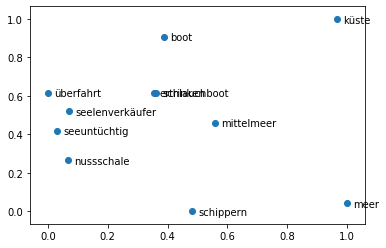

In [5]:
draw_image('mittelmeer', get_best(2015))

In [ ]:
from IPython import display

/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


16


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.1925611905829782, 'macro': 0.2596420045913583, 'results': [{'name': 'bruni_men', 'score': 0.10899050178499718, 'oov': 0.807}, {'name': 'ws353', 'score': 0.2861722676242363, 'oov': 0.5807365439093485}, {'name': 'ws353_relatedness', 'score': 0.2965844836228044, 'oov': 0.5952380952380952}, {'name': 'radinsky_mturk', 'score': 0.48897823326682155, 'oov': 0.7874564459930313}, {'name': 'luong_rare', 'score': 0.0830812680735666, 'oov': 0.9847590953785644}, {'name': 'ws353_similarity', 'score': 0.29404527317572365, 'oov': 0.5517241379310345}]}
OrderedDict([('neg', 16), ('eig', 0.2), ('dim', 500), ('pair_args_window', 5)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


16


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.20850251855400484, 'macro': 0.30525780809931075, 'results': [{'name': 'bruni_men', 'score': 0.1282314829041148, 'oov': 0.791}, {'name': 'ws353', 'score': 0.28331181879863704, 'oov': 0.5694050991501416}, {'name': 'ws353_relatedness', 'score': 0.3050485331262824, 'oov': 0.5873015873015873}, {'name': 'radinsky_mturk', 'score': 0.5285414017553647, 'oov': 0.7874564459930313}, {'name': 'luong_rare', 'score': 0.30894309880673904, 'oov': 0.9857423795476893}, {'name': 'ws353_similarity', 'score': 0.27747051320472665, 'oov': 0.5369458128078818}]}
OrderedDict([('neg', 16), ('eig', 0.0), ('dim', 600), ('pair_args_window', 4)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


10


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.2779715129672322, 'macro': 0.3695269162009867, 'results': [{'name': 'bruni_men', 'score': 0.20610772011835585, 'oov': 0.783}, {'name': 'ws353', 'score': 0.31760340106961016, 'oov': 0.56657223796034}, {'name': 'ws353_relatedness', 'score': 0.32692188102552894, 'oov': 0.5833333333333334}, {'name': 'radinsky_mturk', 'score': 0.6180534625642087, 'oov': 0.7526132404181185}, {'name': 'luong_rare', 'score': 0.38261986963351496, 'oov': 0.984267453294002}, {'name': 'ws353_similarity', 'score': 0.36585516279470165, 'oov': 0.5467980295566502}]}
OrderedDict([('neg', 10), ('eig', 0.0), ('dim', 600), ('pair_args_window', 3)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


18


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.22432548415242382, 'macro': 0.32990378909242335, 'results': [{'name': 'bruni_men', 'score': 0.1317253501560312, 'oov': 0.7893333333333333}, {'name': 'ws353', 'score': 0.3069806126326376, 'oov': 0.5779036827195467}, {'name': 'ws353_relatedness', 'score': 0.3085530191161678, 'oov': 0.5833333333333334}, {'name': 'radinsky_mturk', 'score': 0.6199141236388822, 'oov': 0.7839721254355401}, {'name': 'luong_rare', 'score': 0.253748095837537, 'oov': 0.9827925270403146}, {'name': 'ws353_similarity', 'score': 0.35850153317328437, 'oov': 0.5665024630541872}]}
OrderedDict([('neg', 18), ('eig', 0.1), ('dim', 500), ('pair_args_window', 5)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


16


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.2581105898625116, 'macro': 0.35001680088180076, 'results': [{'name': 'bruni_men', 'score': 0.14520818159222368, 'oov': 0.787}, {'name': 'ws353', 'score': 0.4108464599405992, 'oov': 0.56657223796034}, {'name': 'ws353_relatedness', 'score': 0.4636222566360399, 'oov': 0.5793650793650794}, {'name': 'radinsky_mturk', 'score': 0.48856429391412665, 'oov': 0.7282229965156795}, {'name': 'luong_rare', 'score': 0.2192862636676107, 'oov': 0.9808259587020649}, {'name': 'ws353_similarity', 'score': 0.3725733495402044, 'oov': 0.5467980295566502}]}
OrderedDict([('neg', 16), ('eig', 0.15000000000000002), ('dim', 500), ('pair_args_window', 5)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


8


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.22790623134628146, 'macro': 0.3257485857088449, 'results': [{'name': 'bruni_men', 'score': 0.15427236339336026, 'oov': 0.778}, {'name': 'ws353', 'score': 0.2926134707901361, 'oov': 0.5807365439093485}, {'name': 'ws353_relatedness', 'score': 0.24188923554248842, 'oov': 0.5873015873015873}, {'name': 'radinsky_mturk', 'score': 0.6657705263525779, 'oov': 0.7804878048780488}, {'name': 'luong_rare', 'score': 0.26899609471461283, 'oov': 0.9837758112094396}, {'name': 'ws353_similarity', 'score': 0.3309498234598939, 'oov': 0.5665024630541872}]}
OrderedDict([('neg', 8), ('eig', 0.05), ('dim', 500), ('pair_args_window', 5)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.19261842960550327, 'macro': 0.2227693961279739, 'results': [{'name': 'bruni_men', 'score': 0.15157535316420545, 'oov': 0.7886666666666666}, {'name': 'ws353', 'score': 0.2180134306933845, 'oov': 0.5807365439093485}, {'name': 'ws353_relatedness', 'score': 0.2462727931510618, 'oov': 0.5793650793650794}, {'name': 'radinsky_mturk', 'score': 0.5056712645000885, 'oov': 0.7735191637630662}, {'name': 'luong_rare', 'score': -0.0034281105758510494, 'oov': 0.9847590953785644}, {'name': 'ws353_similarity', 'score': 0.21851164583495422, 'oov': 0.5615763546798029}]}
OrderedDict([('neg', 2), ('eig', 0.0), ('dim', 500), ('pair_args_window', 5)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


3


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.24768468183499617, 'macro': 0.3150545992196253, 'results': [{'name': 'bruni_men', 'score': 0.18867710862308257, 'oov': 0.766}, {'name': 'ws353', 'score': 0.30160185949635243, 'oov': 0.5552407932011332}, {'name': 'ws353_relatedness', 'score': 0.29649649264354666, 'oov': 0.5555555555555556}, {'name': 'radinsky_mturk', 'score': 0.4821649012288224, 'oov': 0.7456445993031359}, {'name': 'luong_rare', 'score': 0.27026437318174523, 'oov': 0.9813176007866273}, {'name': 'ws353_similarity', 'score': 0.3511228601442025, 'oov': 0.5467980295566502}]}
OrderedDict([('neg', 3), ('eig', 0.0), ('dim', 500), ('pair_args_window', 5)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


5


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.2254383630096914, 'macro': 0.33514840224818165, 'results': [{'name': 'bruni_men', 'score': 0.13366747566540674, 'oov': 0.763}, {'name': 'ws353', 'score': 0.3121486915173675, 'oov': 0.5042492917847026}, {'name': 'ws353_relatedness', 'score': 0.29327792785139917, 'oov': 0.49603174603174605}, {'name': 'radinsky_mturk', 'score': 0.5054733216727296, 'oov': 0.7630662020905923}, {'name': 'luong_rare', 'score': 0.3828473380035858, 'oov': 0.9808259587020649}, {'name': 'ws353_similarity', 'score': 0.38347565877860107, 'oov': 0.49261083743842365}]}
OrderedDict([('neg', 5), ('eig', 0.0), ('dim', 500), ('pair_args_window', 5)])


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


8


/home/filter/anaconda3/envs/hyperhyper/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


svd
{'micro': 0.26930185228697295, 'macro': 0.3624586386896764, 'results': [{'name': 'bruni_men', 'score': 0.17136740449772378, 'oov': 0.7516666666666667}, {'name': 'ws353', 'score': 0.40143668317891884, 'oov': 0.5240793201133145}, {'name': 'ws353_relatedness', 'score': 0.4197091271684112, 'oov': 0.5158730158730159}, {'name': 'radinsky_mturk', 'score': 0.545023870222771, 'oov': 0.7386759581881533}, {'name': 'luong_rare', 'score': 0.23537085281505168, 'oov': 0.9818092428711898}, {'name': 'ws353_similarity', 'score': 0.40184389425518224, 'oov': 0.5172413793103449}]}
OrderedDict([('neg', 8), ('eig', 0.0), ('dim', 500), ('pair_args_window', 5)])


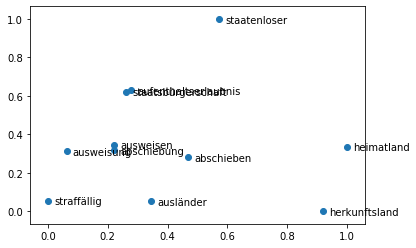

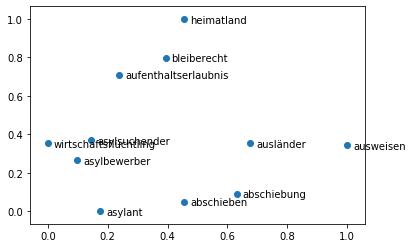

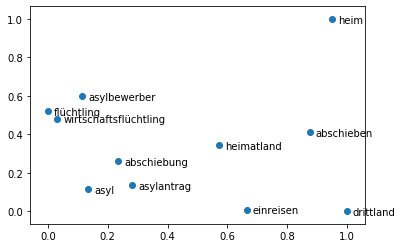

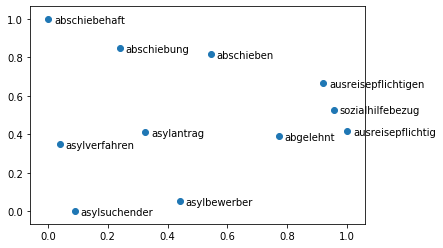

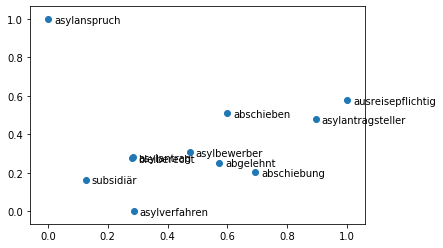

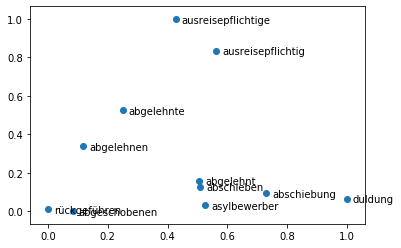

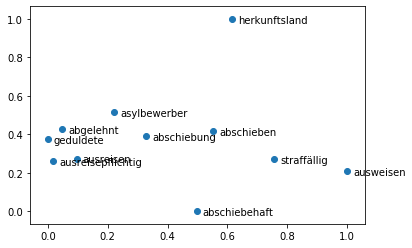

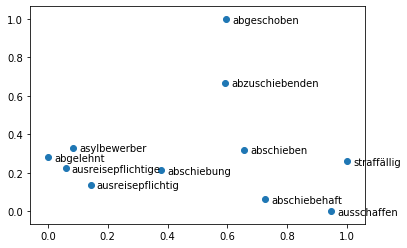

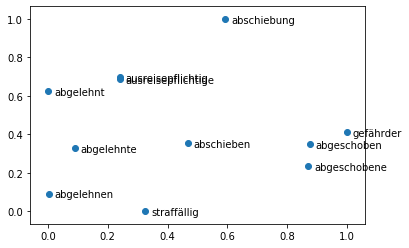

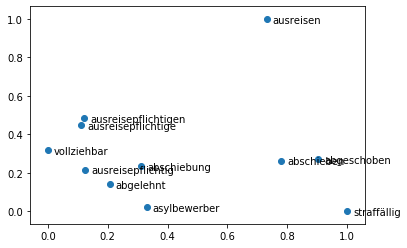

In [30]:
for year in range(2010, 2020):
    draw_image('abschieben', get_best(year))

In [26]:
def get_most_similar(w, kv):
    names = [w]
    vecs = [kv[w]]
    for name, _ in kv.most_similar(w):
        names.append(name)
        vecs.append(kv[name])
    return vecs, names

def to_2d(vecs):
    pca = PCA(n_components=2)
    scaler = MinMaxScaler()
    points = pca.fit_transform(vecs)
    points = scaler.fit_transform(points)
    return points

In [32]:
kvs = [kv1, kv2]

NameError: name 'kv2' is not defined

In [33]:
def get_vectors(w):
    ps = [get_most_similar(w, kv) for kv in kvs]
    settings = [ps[0]]
    for i in range(1, len(ps)):
        # look up previous points in current frame
        prev_names = []
        prev_vs = []
        prev_fade = np.zeros(10)
        for index,name in enumerate(ps[1][i - 1]):
            if name in kvs[i]:
                prev_vs.append(kvs[i][name])
            else:
                prev_fade[index] = 1
            prev_names.append(name)
        all_points = np.hstack((ps[0], prev_vs))
        all_points = to_2d(all_points)
        settings.append(all_points, ps[1] + prev_names, prev_fade)
#     TODO: align
    return settings

In [23]:
get_vectors('merkel')

[(array([[0.20872798, 0.19919427],
         [0.15586222, 0.18080063],
         [0.04034906, 0.17841899],
         [0.10675526, 0.3843708 ],
         [0.37290588, 0.53377502],
         [0.        , 0.01564973],
         [0.50446702, 0.39185754],
         [0.47629255, 0.69460231],
         [0.39071135, 1.        ],
         [1.        , 0.23472053],
         [0.9870857 , 0.        ]]),
  ['merkel',
   'angela',
   'kanzlerin',
   'bundeskanzlerin',
   'physikerin',
   'merkels',
   'fdjsekretärin',
   'cduchefin',
   'richtlinienkompetenz',
   'teflon',
   'angie']),
 (array([[0.34235509, 0.41355619],
         [0.13210742, 0.41235865],
         [0.17012759, 0.5302701 ],
         [0.04076794, 0.59586778],
         [0.22061005, 0.33663263],
         [0.56071379, 0.        ],
         [0.2577408 , 0.41072945],
         [0.82647434, 0.25424784],
         [0.        , 0.83771065],
         [0.73444356, 1.        ],
         [1.        , 0.70662784]]),
  ['merkel',
   'angela',
   'kanzlerin',

In [5]:
def get_anim(w, settings):
    num_settings = len(settings)

    vecs = [(w, kv[w])]
    for name, _ in kv.most_similar(w):
        vecs.append((name, kv[name]))
    principalComponents = pca.fit_transform([x[1] for x in vecs])
    principalComponents = scaler.fit_transform(principalComponents)

    points = [principalComponents, principalComponents + 0.2]

    fig, ax = plt.subplots()
    scat = ax.scatter(principalComponents[:, 0], principalComponents[:, 1])

    #     for i, txt in enumerate([x[0] for x in vecs]):
    #         x = principalComponents[i][0] + 0.02
    #         y = principalComponents[i][1] - 0.02
    #         ax.annotate(txt, (x, y))

    def init():
        scat.set_offsets(principalComponents)
        return (scat,)

    # animation function.  This is called sequentially
    def animate(t):
        cur_set = math.floor(t)
        t -= cur_set

        cur_points = settings[cur_set]
        if cur_set < num_settings:
            next_points = settings[cur_set][:10]
            
        else:
            next_points = cur_points

        interpolation = cur_points * (1 - t) + next_points * t
        scat.set_offsets(interpolation)
        return (scat,)

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(
        fig,
        animate,
        init_func=init,
        frames=np.arange(0, num_settings, 0.01),
        interval=20,
        blit=True,
    )
    return anim

In [6]:
a = get_anim('cdu')

NameError: name 'kv' is not defined

In [4]:
HTML(a.to_html5_video())

NameError: name 'a' is not defined

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [ ]:
HTML(anim.to_html5_video())